### Objective: To build a time series forecasting model to predict how many goods will be imported in the future

### Data description: 

The dataset describes the number of goods imported in the United Kingdom from the year 1964-2004. The number of goods imported and distributed are an estimate of the number of goods dributed to the United Kingdom.

In [27]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt,seaborn as sns

In [197]:
df=pd.read_excel('ukimport.xlsx')

In [198]:
df.shape

#44 rows and 1 columns

(44, 1)

In [199]:
df.head()

,import
0,1382
1,1417
2,1432
3,1438
4,1457


In [200]:
df.describe()

#1379 is the minimum number of items imported and 2197 is the max

,import
count,44.000000
mean,1685.568182
std,239.314758
min,1379.000000
25%,1453.250000
50%,1651.000000
75%,1911.500000
max,2197.000000


There are totally 44 values and the mean of the number of goods imported is 1685.56. The average of minimum goods imported in a year was 239 and maximum has been 2197 in the United Kingdom.

In [201]:
df.isnull().sum()

#No Null Values

import    0
dtype: int64

Dataset has no Null Values

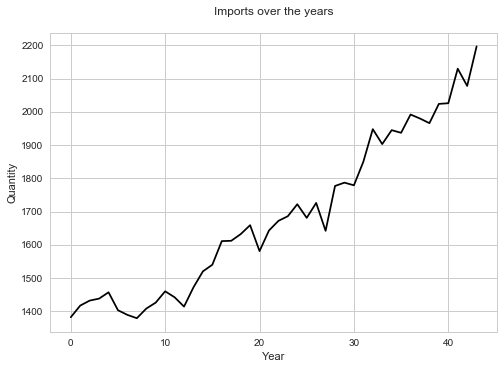

In [202]:
plt.plot(df)
plt.title('Imports over the years\n')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

## Checking for Stationarity

In [204]:
from statsmodels.tsa.stattools import adfuller

In [205]:
result=adfuller(df,autolag='AIC')

In [206]:
print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 1.296407
p-value: 0.996589
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605
Failed to Reject Ho - Time Series is Non-Stationary


Using first order differencing to make it stationary

In [207]:
series=df.diff()

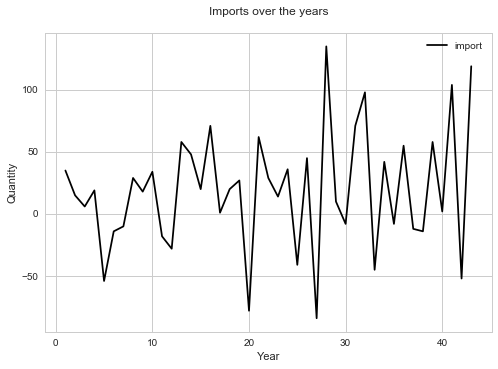

In [208]:
series.plot()
plt.title('Imports over the years\n')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

In [209]:
#removing the first value since its NA

Series=series.dropna()

In [210]:
Series.head()

,import
1,35.0
2,15.0
3,6.0
4,19.0
5,-54.0


In [211]:
result1=adfuller(Series,autolag='AIC')

In [212]:
print('ADF Statistic: %f' % result1[0])

print('p-value: %f' % result1[1])

print('Critical Values:')

for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))
if result1[0] < result1[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -9.862195
p-value: 0.000000
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605
Reject Ho - Time Series is Stationary


### Plotting ACF and PACF plots to check lag correlation

In [213]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

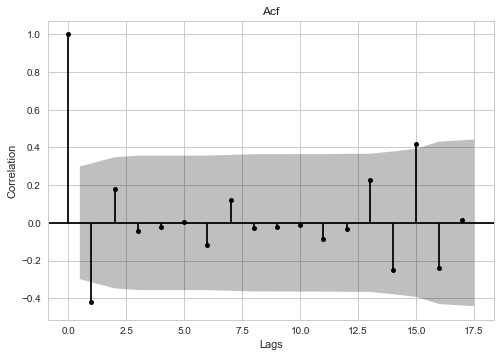

In [214]:
plot_acf(Series)
plt.title("Acf")
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

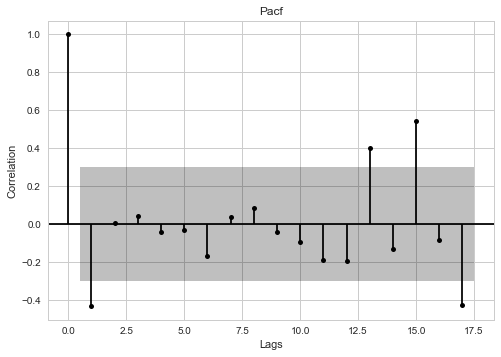

In [215]:
plot_pacf(Series)
plt.title("Pacf")
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

##### Looking at the ACF and PACF plots, we can observe that it is tailing off in the ACF plot and oscillating in the pacf plot with high correlation at lag 1 which implies that its an AR(1) model

In [216]:
from statsmodels.tsa.arima_model import ARIMA

In [217]:
model=ARIMA(Series, order=(1, 0, 0)) 

C:\Users\Srikar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [218]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 import   No. Observations:                   43
Model:                     ARMA(1, 0)   Log Likelihood                -222.932
Method:                       css-mle   S.D. of innovations             43.067
Date:                Wed, 13 Jul 2022   AIC                            451.864
Time:                        12:10:12   BIC                            457.148
Sample:                             0   HQIC                           453.812
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           18.0899      4.535      3.989      0.000       9.202      26.978
ar.L1.import    -0.4602      0.142     -3.252      0.001      -0.738      -0.183
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1730           +0.0000j            2.1730            0.5000
-----------------------------------------------------------------------------
"""

In [219]:
results=model.fit()

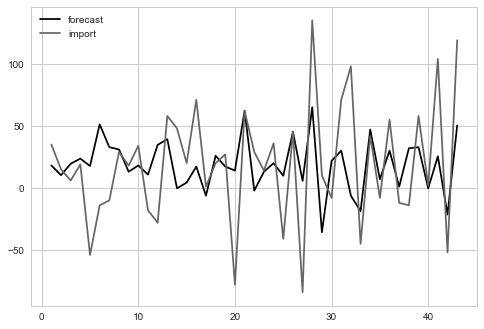

In [220]:
results.plot_predict()
plt.show()

We observe that the forecasted models moves in a similar direction as the observed values but there is a huge difference in the estimated and observed. This could be due to other external factors such as weather, inflation, war, economic crisis.To build a better model, we have to make it a multivariate time series model and add other external factors.

# Residual Analysis

- To check if residuals are normally distributed or not
- To check if residauls are not autocorrelated

In [222]:
Series.head()

,import
1,35.0
2,15.0
3,6.0
4,19.0
5,-54.0


In [223]:
pred=pd.DataFrame(results.predict())

In [224]:
err=pd.concat([Series,pred],axis=1)
err.head()

,import,0
1,35.0,18.089937
2,15.0,10.307966
3,6.0,19.511918
4,19.0,23.653697
5,-54.0,17.671128


In [225]:
err.columns=('Observed','Expected')

In [226]:
err.head()

,Observed,Expected
1,35.0,18.089937
2,15.0,10.307966
3,6.0,19.511918
4,19.0,23.653697
5,-54.0,17.671128


In [227]:
err['Error']=err['Observed']-err['Expected']
err['Error'].head()

1    16.910063
2     4.692034
3   -13.511918
4    -4.653697
5   -71.671128
Name: Error, dtype: float64

In [228]:
plt.style.use('seaborn-whitegrid')

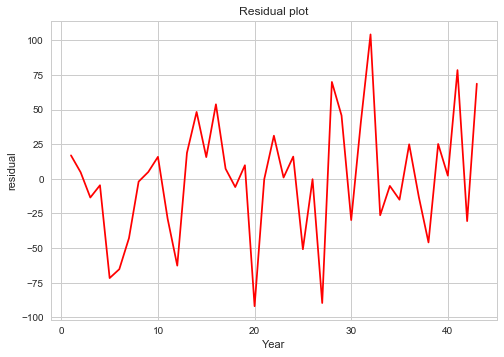

In [231]:
plt.plot(err['Error'],color='red')
plt.xlabel('Year')
plt.ylabel('residual')
plt.title('Residual plot')
plt.show()

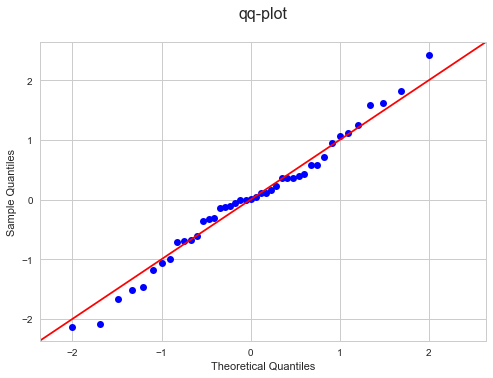

In [232]:
import statsmodels.api as sm
sm.qqplot(err['Error'], line = "45", fit = True)
plt.title('qq-plot\n',fontsize=16)
plt.show()

In [233]:
from scipy.stats import shapiro

In [234]:
norm=shapiro(err['Error'])
print('p-valus is',norm[1],'which is greater than 0.05 (significance value) \nand hence we reject the H0 and say that it is normally distributed')

p-valus is 0.823890745639801 which is greater than 0.05 (significance value) 
and hence we reject the H0 and say that it is normally distributed


## Autocorrelation in residuals

In [235]:
import statsmodels.api as sm

In [236]:
sm.stats.acorr_ljungbox(err['Error'], lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,0.633683,0.986409


We observe that the p-value is greater than significance value (0.05) and accept the null hypothesis and say that the residuals are not autocorrelated or are independant of each other.

## Conclusion

We observe that the model is inaccurate and needs to be improved.One has to build a mutivariate time series model to imporve.